In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_customers.csv')

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

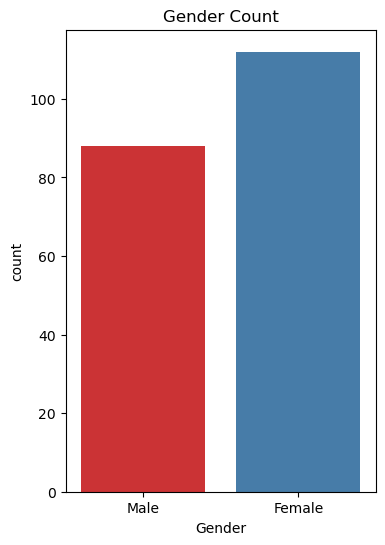

In [9]:
plt.figure(figsize=(4,6))
sns.countplot(x = 'Gender', data = df, palette = 'Set1')
plt.title('Gender Count');

In [10]:
fig = px.pie(
    data_frame=df, 
    names='Gender', 
    title='Customer Genders', 
    hole=0.1, 
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

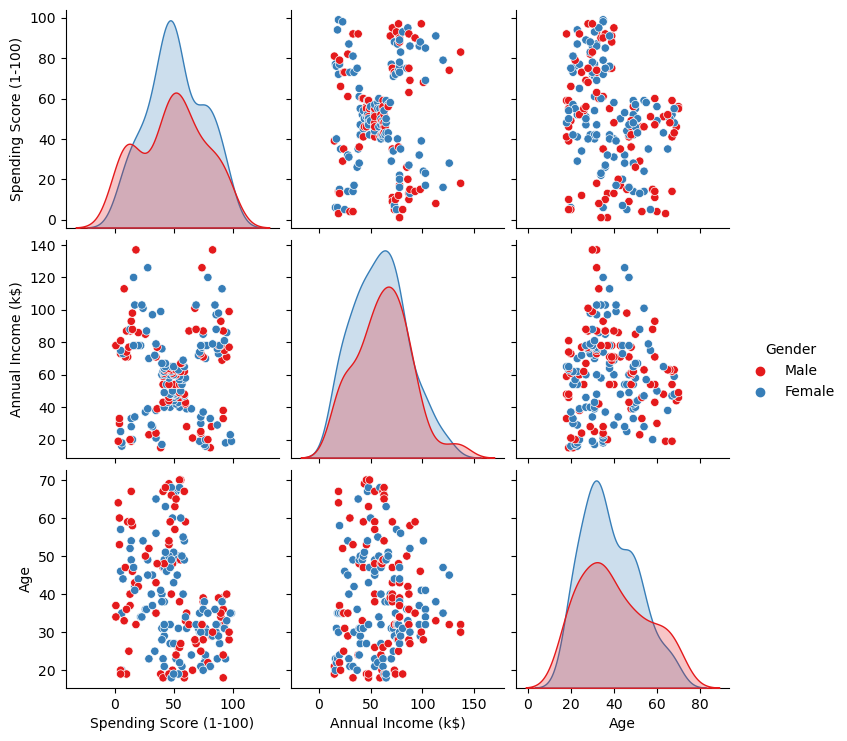

In [11]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender", palette = "Set1") 

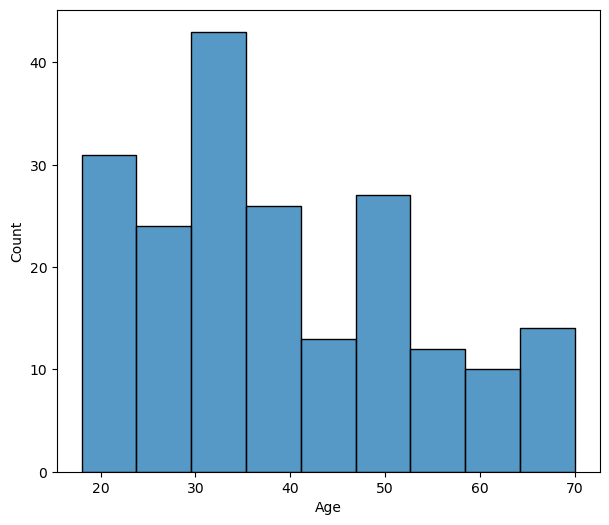

In [13]:
plt.figure(figsize=(7,6))
sns.histplot(df.Age)
plt.show()

The customers of age groups 20-40 are visting the mall more. But there is no clear pattern in the age so let us group them into different age groups.

Age < 25 => Teens
Age < 55 => Adults
Age > 55 => Seniors

In [15]:
df["Age_groups"] = pd.cut(df["Age"], [0, 25, 55, np.inf], labels=['Teens', 'Adults', 'Seniors'])

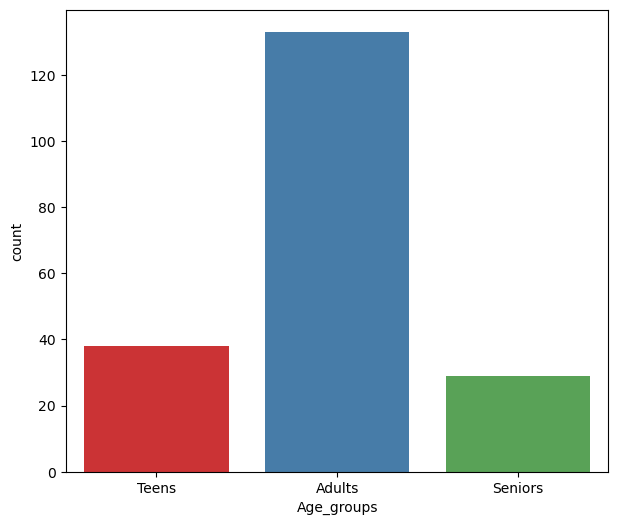

In [16]:
plt.figure(figsize=(7,6))
sns.countplot(df.Age_groups,palette = 'Set1')
plt.show()

So, adults are visiting the mall frequently compared to teens and seniors

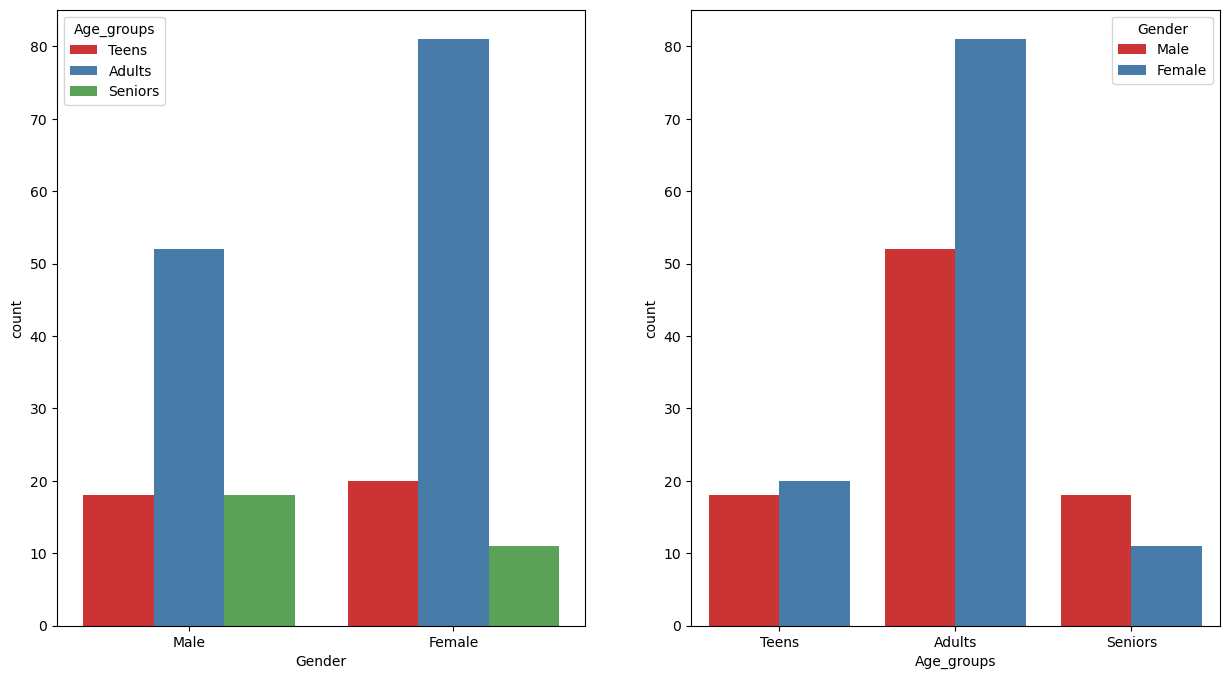

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=df, hue='Age_groups',palette = 'Set1')
plt.subplot(1,2,2)
sns.countplot(x='Age_groups', data=df, hue='Gender',palette = 'Set1')
plt.show()

More number of females are visting the mall than males
Among teens there isn't much difference between number of male and female visitors
Among adults, females are visiting the mall frequently compared to males
Among seniors, there isn't much difference between male and females

#### Average Income

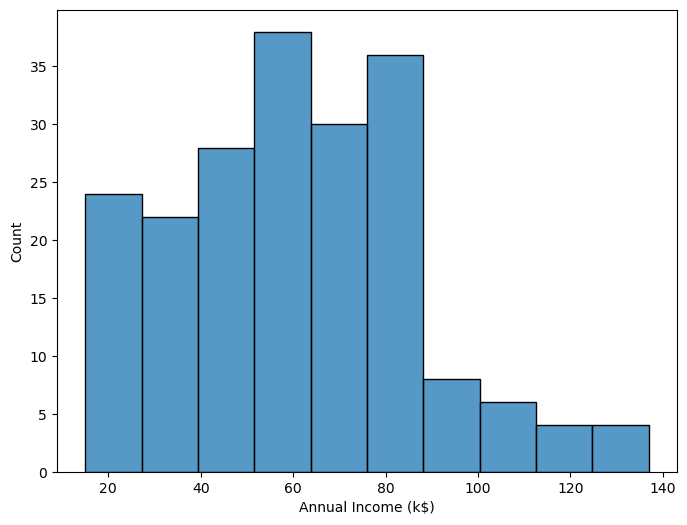

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['Annual Income (k$)'])
plt.show()

Majority of visitors of the mall are with the average income range of 60k-80k and very few people with average income >90k are visiting the malls

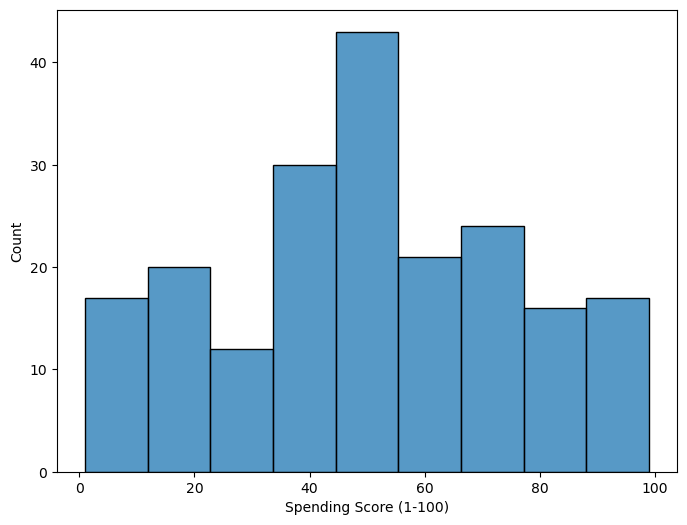

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(df['Spending Score (1-100)'])
plt.show()

#### Bivariate Analysis

In [21]:
male=df[df.Gender=='Male']
female=df[df.Gender=='Female']

male_score=male['Spending Score (1-100)'].mean()
female_score=female['Spending Score (1-100)'].mean()
male_income=male['Annual Income (k$)'].mean()
female_income=female['Annual Income (k$)'].mean()

print("Male Mean Score = {} ".format(male_score))
print()
print("Female Mean Score = {} ".format(female_score))
print()
print("Male Mean Income = {} ".format(male_income))
print()
print("Female Mean Income = {} ".format(female_income))

Male Mean Score = 48.51136363636363 

Female Mean Score = 51.526785714285715 

Male Mean Income = 62.22727272727273 

Female Mean Income = 59.25 


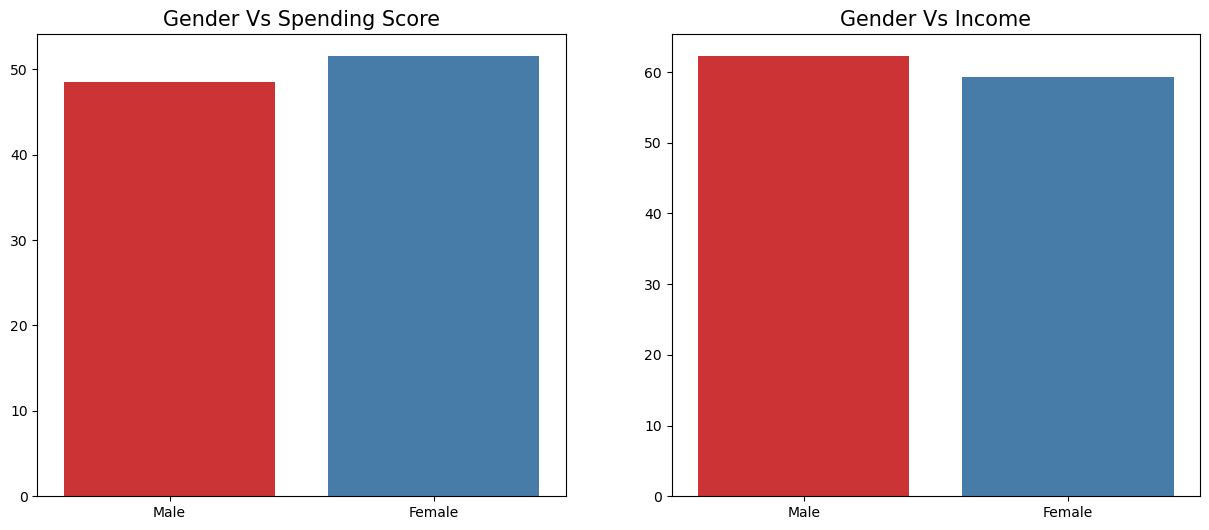

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=['Male','Female'], y=[male_score,female_score], palette = 'Set1')
plt.title('Gender Vs Spending Score',size=15)

plt.subplot(1,2,2)
sns.barplot(x=['Male','Female'], y=[male_income,female_income], palette = 'Set1')
plt.title('Gender Vs Income',size=15)
plt.show()


The mean spending score and income of males and females are almost equal. So, gender is not a suitable variable to create a cluster with spending score or income

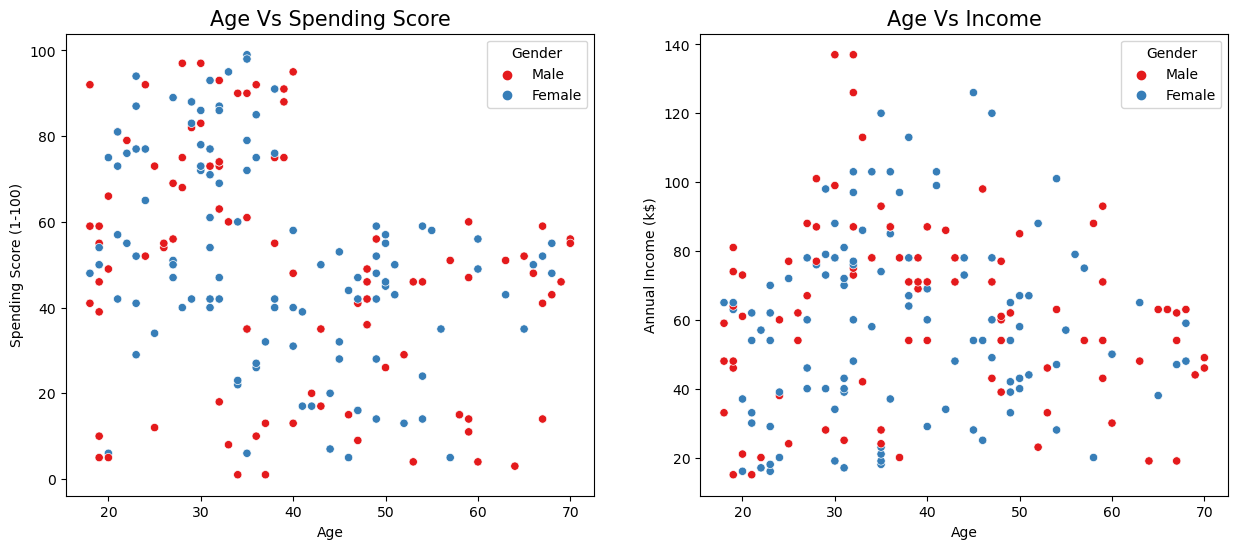

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x = df.Age, y = df['Spending Score (1-100)'],hue=df['Gender'],palette = 'Set1')
plt.title('Age Vs Spending Score',size=15)

plt.subplot(1,2,2)
sns.scatterplot(x = df.Age, y = df['Annual Income (k$)'],hue=df['Gender'],palette = 'Set1')
plt.title('Age Vs Income',size=15)
plt.show()

It seems like it is easier to form clusters using Age and Spending Score. So, Age and Spending Score are better attributes for forming clusters and Age and Income are not better attributes for clustering

#### Spending Score and Income

Text(0.5, 1.0, 'Income Vs Spending Score')

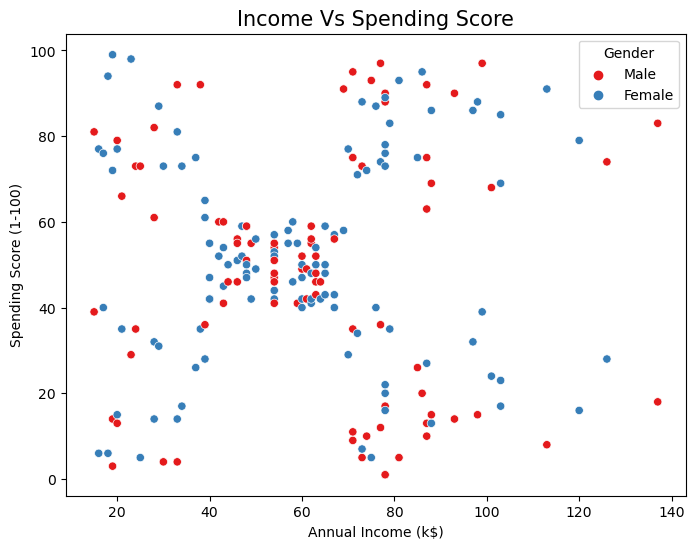

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Gender'],palette = 'Set1')
plt.title('Income Vs Spending Score',size=15)

The scatter plot of Income Vs Spending Score clearly shows different clusters forming in the data.So, Income and Score are good attributes for clustering

Insights:

five visually recognizable clusters seem to be represent customers that:
have high income and low spending score
low income and low spending score
high income and low spending score
high income and high spending score
dense middle cluster with middle income and middle spending score

In [59]:
def elbow_graph(X):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Point Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

In [52]:
from sklearn.cluster import KMeans
X = df[['Age', 'Spending Score (1-100)']]
X.head(5)

Age  Spending Score (1-100)
0   19                      39
1   21                      81
2   20                       6
3   23                      77
4   31                      40

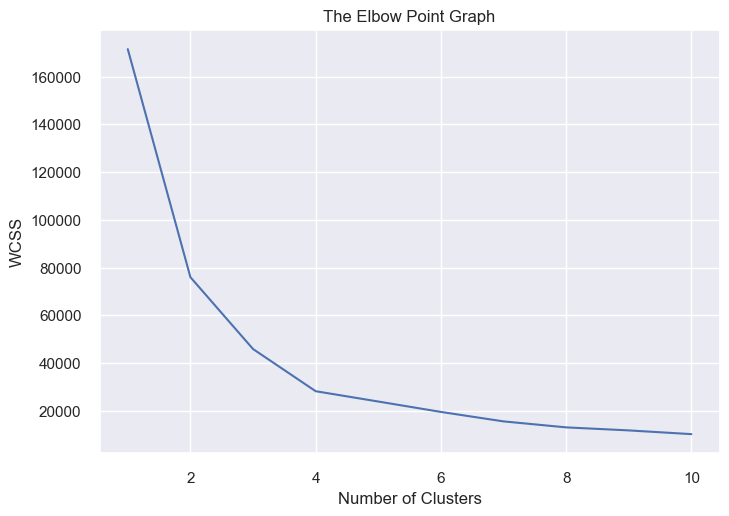

In [32]:
elbow_graph(X)

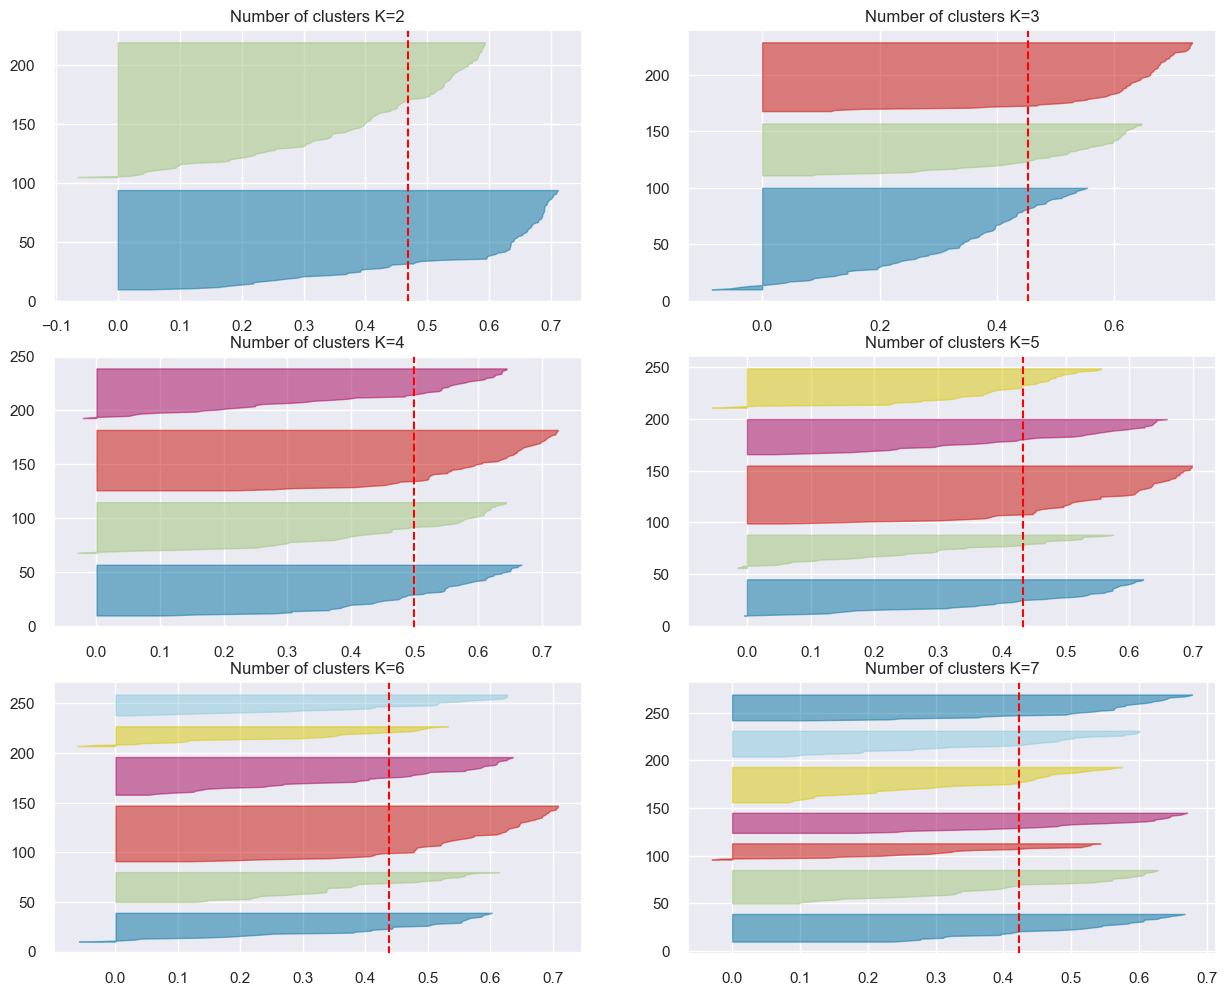

In [53]:
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,12))

for n in [2, 3, 4, 5, 6, 7]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(n, 2)
    #Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    ax[q-1,mod ].set_title("Number of clusters K="+str(n))
    visualizer.fit(X)

### K-Means Clustering

##### Pre processing data to built the model 

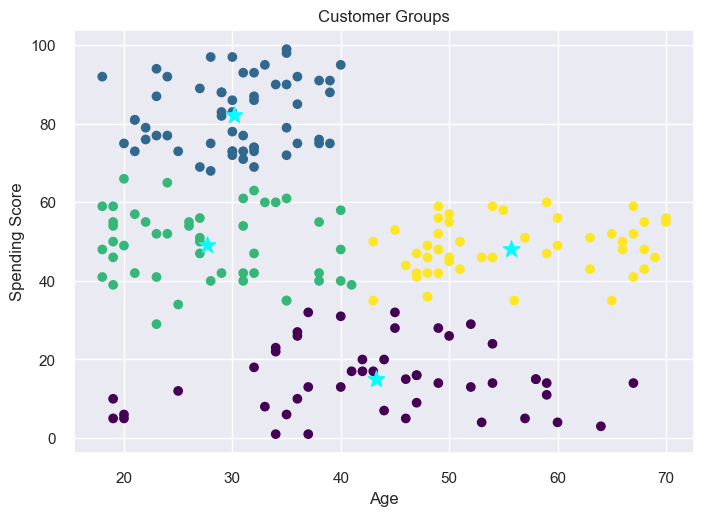

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0 ,)
Y = kmeans.fit_predict(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150,marker='*' ,c='cyan')
plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

##### Clustering with Income and Spending Score

In [34]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

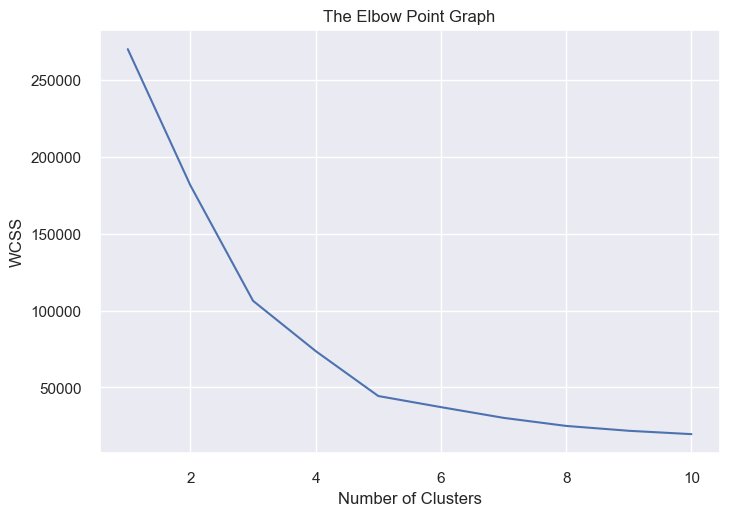

In [35]:
elbow_graph(X2)

So, the graph takes a abrupt shift at 5. So, optimal number of clusters to be formed are 5.

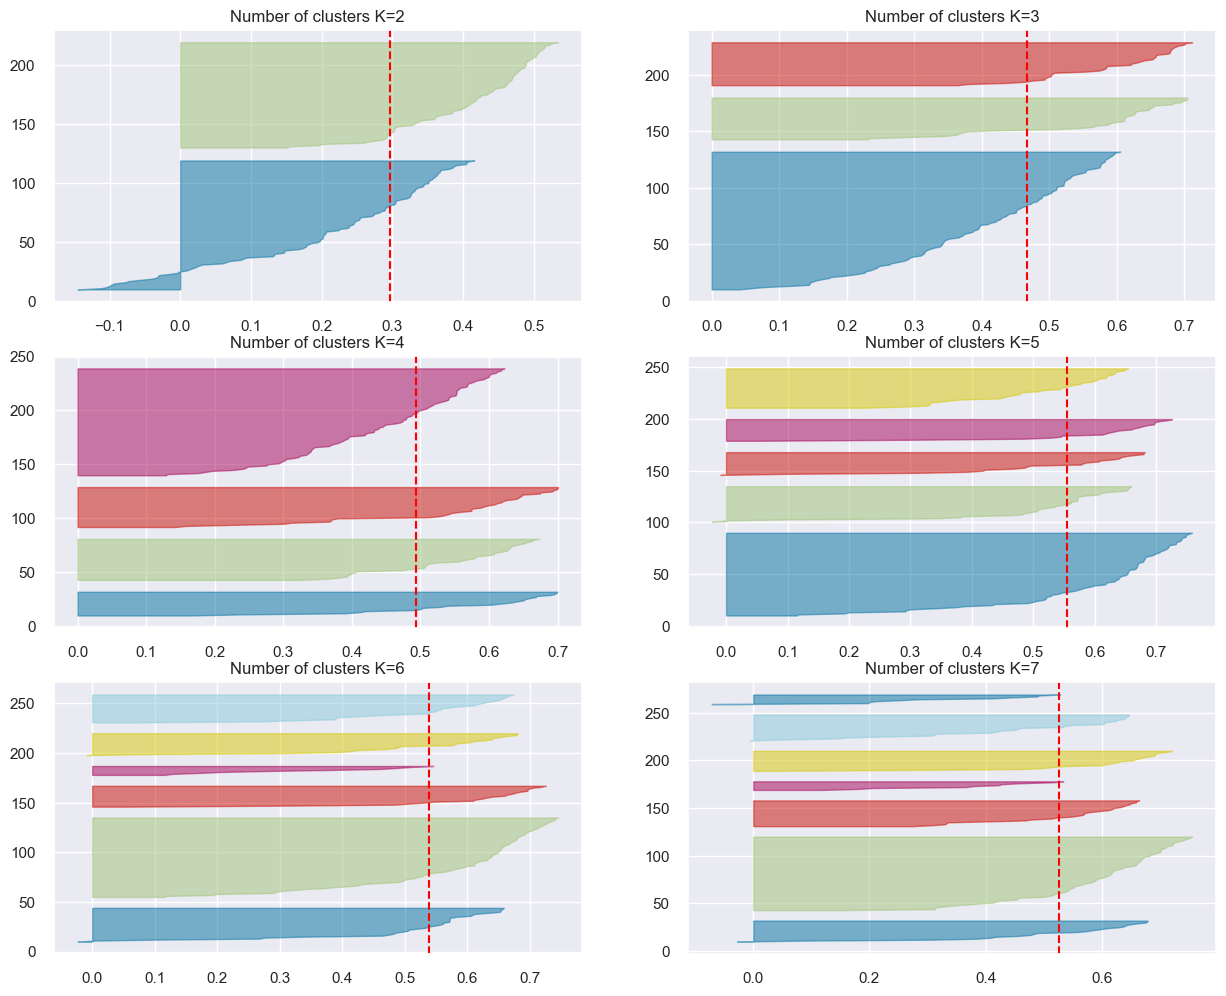

In [57]:
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,12))

for n in [2, 3, 4, 5, 6, 7]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(n, 2)
    #Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    ax[q-1,mod ].set_title("Number of clusters K="+str(n))
    visualizer.fit(X2)

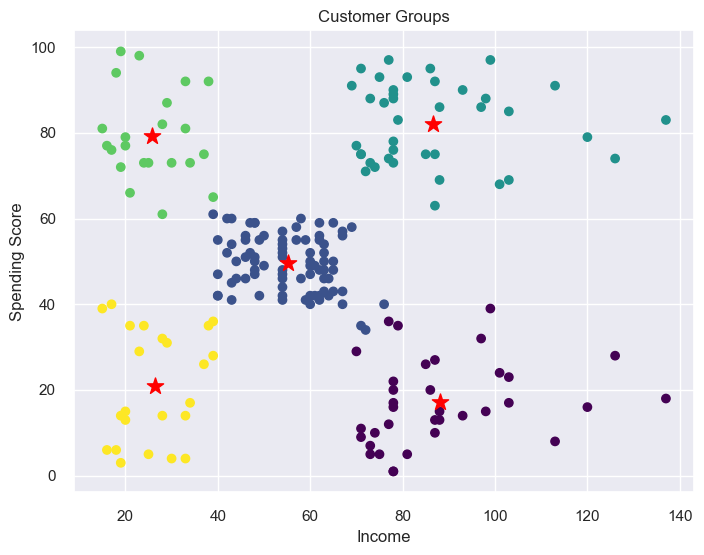

In [58]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y2 = kmeans.fit_predict(X2)
plt.figure(figsize=(8,6))
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],c=Y2,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150,marker='*' ,c='red')
plt.title('Customer Groups')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

Lets try taking 3 feautures age,income,spending scores

In [55]:
X3 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

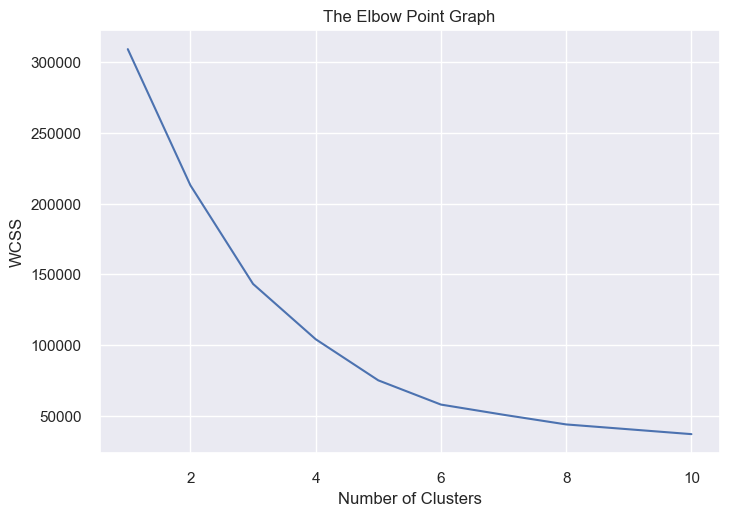

In [60]:
elbow_graph(X3)

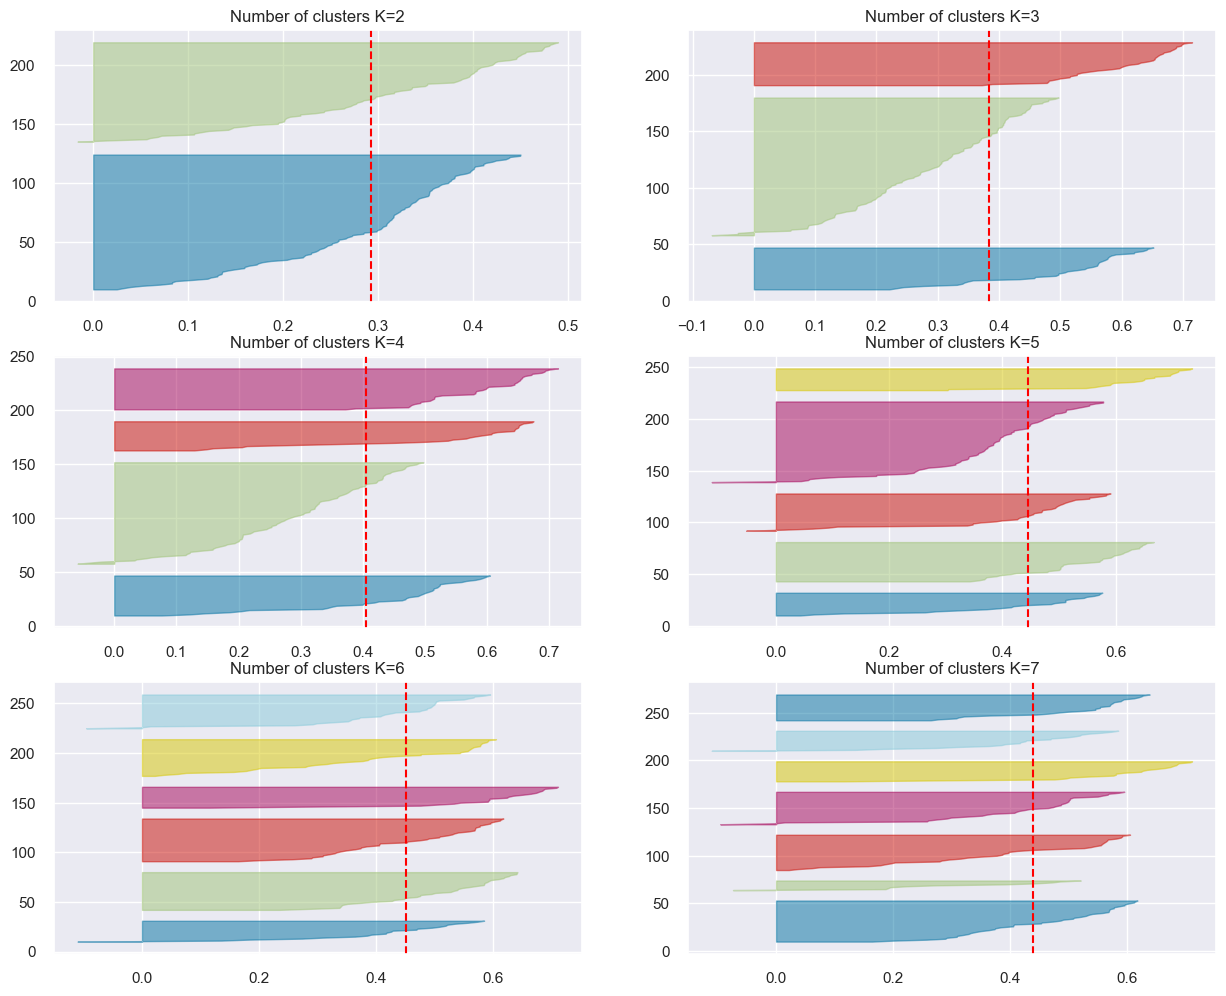

In [64]:
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,12))

for n in [2, 3, 4, 5, 6, 7]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(n, 2)
    #Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    ax[q-1,mod ].set_title("Number of clusters K="+str(n))
    visualizer.fit(X3)

In [73]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [76]:
import plotly.graph_objs as go
import plotly as py

In [77]:
df['X3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['X3'], 
        size= 20,
        line=dict(
            color= df['X3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)